In [20]:
# Add relevant Jupyter notebook extensions

# --- Add relevant Jupyter notebook extensions and plotting options ---

# Allow inline plots
%matplotlib inline

# Optional: better visuals
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

# If you use autoreload (helpful while editing your code)
%load_ext autoreload
%autoreload 2




In [21]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/maxsalisbury/Documents/Uni/YEAR 3/B1/Scientific coding/b1-coding-practical-mt24', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/Users/maxsalisbury/.venvs/first-venv/lib/python3.12/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

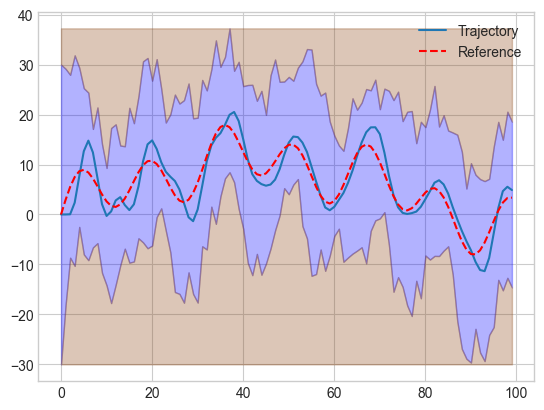

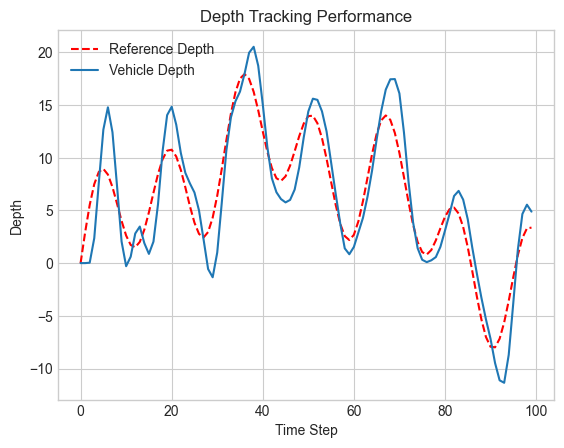

In [22]:
# --- Simulate closed-loop with a PD controller ---
# --- Simulate closed-loop with a PD controller ---

# Ensure project root is importable (because notebook is in notebooks/)
import sys, pathlib
project_root = pathlib.Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Imports
from uuv_mission.dynamic import Mission, Submarine, ClosedLoop
from uuv_mission.control import PDController

# 1) Instantiate submarine and controller
sub = Submarine()
controller = PDController(KP=0.20, KD=0.70)   # Tune KP and KD if needed

# 2) Create closed-loop system
closed_loop = ClosedLoop(sub, controller)

# 3) Load mission (note: go up one folder to reach data/)
mission = Mission.from_csv("../data/mission.csv")

# 4) Simulate with random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.3)

# 5) Plot the completed mission
trajectory.plot_completed_mission(mission)


# --- Extra: Depth vs Time Step plot ---
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(len(mission.reference))
plt.plot(t, mission.reference, 'r--', label="Reference Depth")
plt.plot(t, trajectory.position[:, 1], label="Vehicle Depth")
plt.xlabel("Time Step")
plt.ylabel("Depth")
plt.legend()
plt.title("Depth Tracking Performance")
plt.show()

